# Data Science Project

This notebook contains a template for a data science project with common sections and workflows.

## Project Overview
- **Objective**: Define your project goals here
- **Dataset**: Describe your dataset
- **Methodology**: Outline your approach

## 1. Instalaciones e imports

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import miceforest as mf
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Limpieza de datos

In [3]:
# Cargamos los datos
df = pd.read_csv('datos.csv')

In [4]:
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,36c8346b6d40f83d8860d7dc8edaa143f95747932b759a...,628426003,0.020322,2,628426,Killa Top,254,Top,Garment Upper body,...,Womens Premium,1013.0,Dresses Ladies,"Satin cami top with a lace trim, narrow adjust...",NaN,NaN,ACTIVE,NONE,24.0,934bde8617a60c85b86d942ede4c9735fd80d2e12c364e...
1,2018-09-20,b52295cc89b8acfd1148604ed48d7adb853cf77fbdee25...,616598005,0.045746,2,616598,Slim Straight 5pkt Midway,272,Trousers,Garment Lower body,...,Denim Men,1016.0,Trousers Denim,5-pocket jeans in washed denim with a regular ...,1.0,1.0,ACTIVE,Regularly,58.0,75c1538836ccd37ec8b3f770cc2a30252c7b5888824f26...
2,2018-09-20,8b2c88658fb89276b3896aea28021f246f74c65fb82610...,549961004,0.022017,2,549961,Dungarees,267,Jumpsuit/Playsuit,Garment Full body,...,Baby Essentials & Complements,1002.0,Jersey Basic,Dungarees in sweatshirt fabric made from soft ...,NaN,NaN,PRE-CREATE,NONE,34.0,347ffa682af8d74561da511127b1352206637f56864844...
3,2018-09-20,13fe5dd07e6e9483465ed2128fcbcbeec166214715d384...,616715002,0.025407,2,616715,ED Friend cardigan,245,Cardigan,Garment Upper body,...,H&M+,1003.0,Knitwear,Cardigan in a soft fine knit with dropped shou...,NaN,NaN,ACTIVE,NONE,46.0,90d33da1b47c0c2a9c5e3d9b81508b9367db167ab34b59...
4,2018-09-20,f78dfee670d57bcc0acc6fc24bf39bab4b25652e953620...,666448006,0.024610,2,666448,Janet sweater,252,Sweater,Garment Upper body,...,Womens Everyday Collection,1003.0,Knitwear,"Long-sleeved jumper in a soft, fine knit with ...",NaN,NaN,ACTIVE,NONE,49.0,5c0aeef7e76b957e9f24ab01fcdd5955124f2c9cb80a8e...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364346 entries, 0 to 364345
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   t_dat                         364346 non-null  object 
 1   customer_id                   364346 non-null  object 
 2   article_id                    364346 non-null  int64  
 3   price                         364346 non-null  float64
 4   sales_channel_id              364346 non-null  int64  
 5   product_code                  364346 non-null  int64  
 6   prod_name                     364346 non-null  object 
 7   product_type_no               364346 non-null  int64  
 8   product_type_name             364346 non-null  object 
 9   product_group_name            364346 non-null  object 
 10  graphical_appearance_no       364345 non-null  float64
 11  graphical_appearance_name     364345 non-null  object 
 12  colour_group_code             364345 non-nul

In [6]:
#Quitamos columnas innecesarias
df.drop(columns=['customer_id', #se usó para el inner join, ya no sirve
                 'article_id',  #se usó para el inner join, ya no sirve
                 'sales_channel_id', #los autores no dicen que significa
                 'product_code', #redundante
                 'product_type_no', #redundante
                 'graphical_appearance_no', #redundante
                 'colour_group_code', #redundante
                 'perceived_colour_value_id', #redundante
                 'perceived_colour_master_id', #redundante
                 'department_no', #redundante
                 'index_code', #redundante
                 'index_group_no', #redundante
                 'section_no', #redundante
                 'garment_group_no', #redundante
                 'detail_desc', #No procesaremos texto largo
                 'FN', #Solo tiene un valor y no se sabe que significa
                 'Active', #Solo tiene un valor y no se sabe que significa
                 'postal_code' #No aporta información relevante
                ], inplace=True)

In [7]:
#transform t_dat to datetime
df['t_dat'] = pd.to_datetime(df['t_dat'], format='%Y-%m-%d')

In [8]:
#rename t_dat to Transaction_Date
df.rename(columns={'t_dat': 'Transaction_Date'}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364346 entries, 0 to 364345
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Transaction_Date              364346 non-null  datetime64[ns]
 1   price                         364346 non-null  float64       
 2   prod_name                     364346 non-null  object        
 3   product_type_name             364346 non-null  object        
 4   product_group_name            364346 non-null  object        
 5   graphical_appearance_name     364345 non-null  object        
 6   colour_group_name             364345 non-null  object        
 7   perceived_colour_value_name   364345 non-null  object        
 8   perceived_colour_master_name  364345 non-null  object        
 9   department_name               364345 non-null  object        
 10  index_name                    364345 non-null  object        
 11  index_group_n

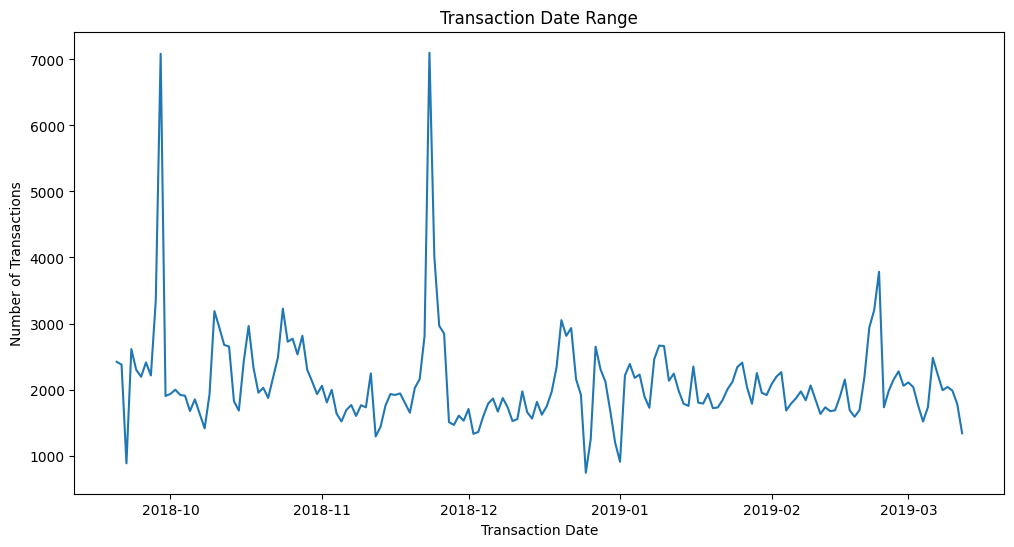

In [10]:
#plot the complete transaction date range using a line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby('Transaction_Date').size())
plt.title('Transaction Date Range')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.show()

In [11]:
#print the min and max values of Transaction_Date  
print("Min Transaction Date:", df['Transaction_Date'].min())
print("Max Transaction Date:", df['Transaction_Date'].max())

Min Transaction Date: 2018-09-20 00:00:00
Max Transaction Date: 2019-03-12 00:00:00


In [12]:
def plot_histogram_with_kde(dataframe, column_name, xlabel, title, bins):
    """
    Generates a histogram with an overlaid KDE plot for a given column in a DataFrame.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to plot.
        xlabel (str): The label for the x-axis.
        title (str): The title of the plot.
    """
    # create a histogram of the column
    dataframe[column_name].hist(bins=bins)
    plt.xlabel(xlabel)  # Add x-axis label
    plt.ylabel("Frequency") # Add y-axis label
    plt.title(title) # Add title

    # Overlay the KDE plot, scaling it to match the histogram
    # 1. Get the histogram's y-axis limits
    ymin, ymax = plt.gca().get_ylim()

    # 2. Create KDE
    kde_line = sns.kdeplot(dataframe[column_name], color='black', common_norm=False)

    # 3. Get KDE line data
    line = kde_line.lines[0]
    x, y = line.get_data()

    # 4. Scale KDE y-values to match histogram
    y = y / y.max() * ymax * 0.8  # Scale and adjust for visibility

    # 5. Update KDE line data
    line.set_data(x, y)

    # remove the grid
    plt.grid(False)

    # Show the plot
    plt.show()

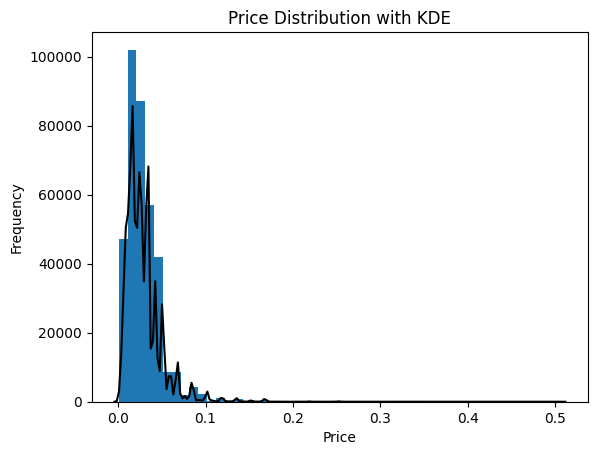

In [13]:
#plot the price distribution using a kde plot
plot_histogram_with_kde(df, 'price', 'Price', 'Price Distribution with KDE', bins=50)

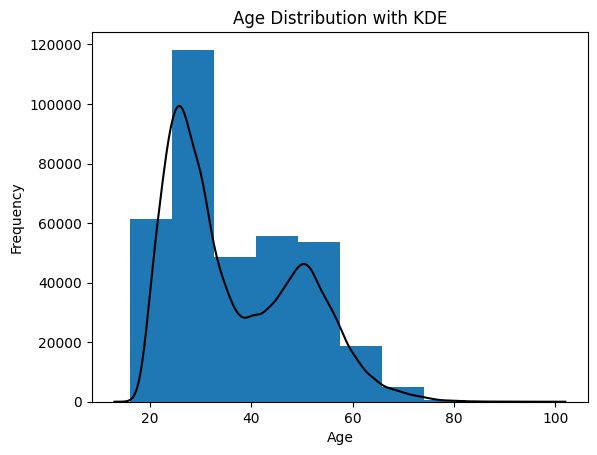

In [14]:
#plot the age distribution using a kde plot
plot_histogram_with_kde(df, 'age', 'Age', 'Age Distribution with KDE', bins=10)

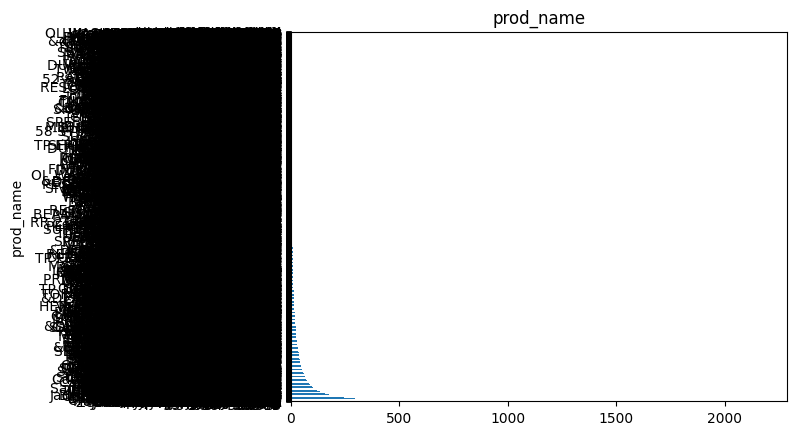

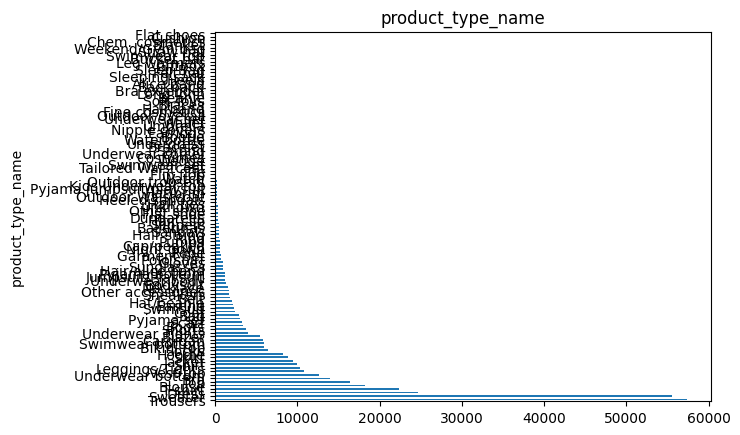

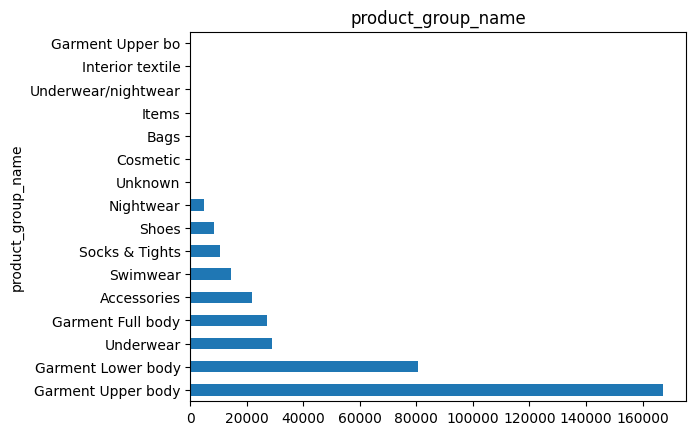

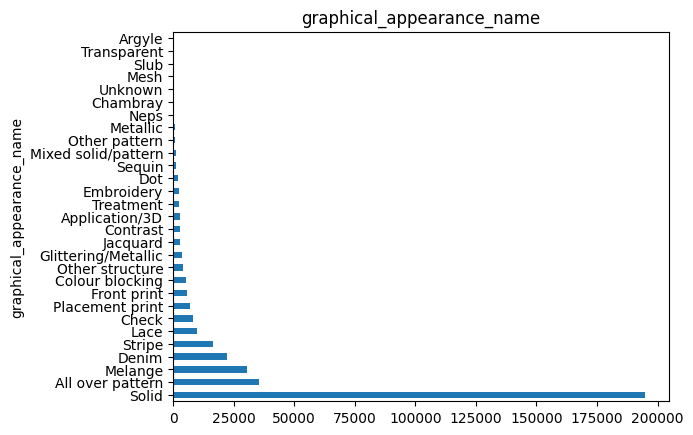

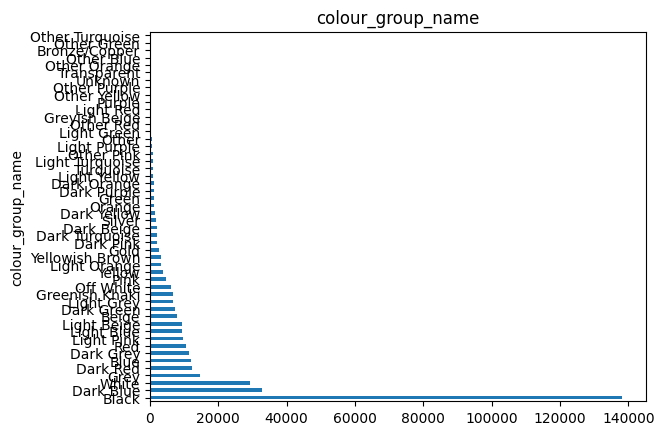

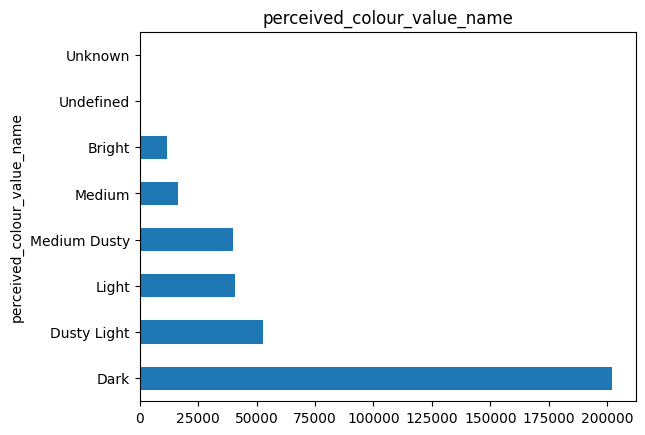

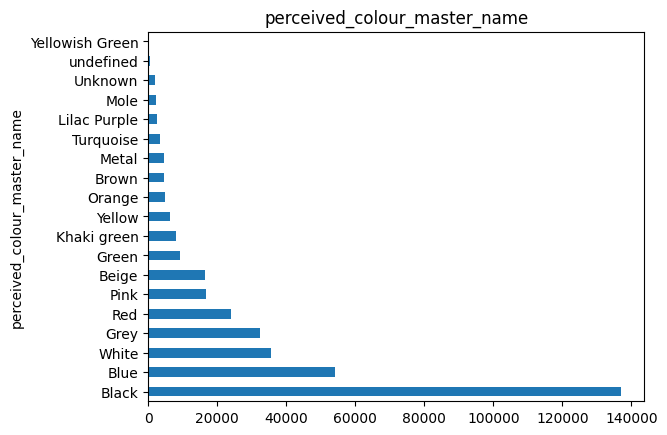

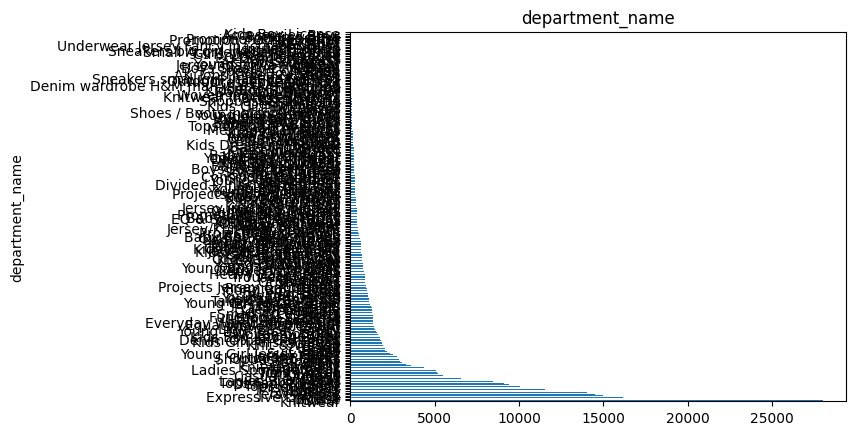

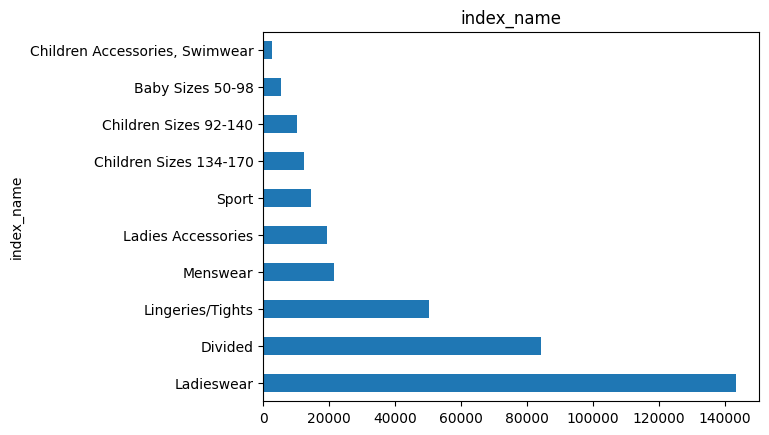

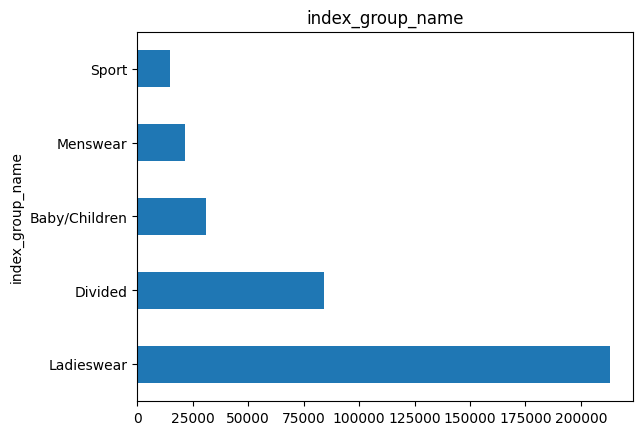

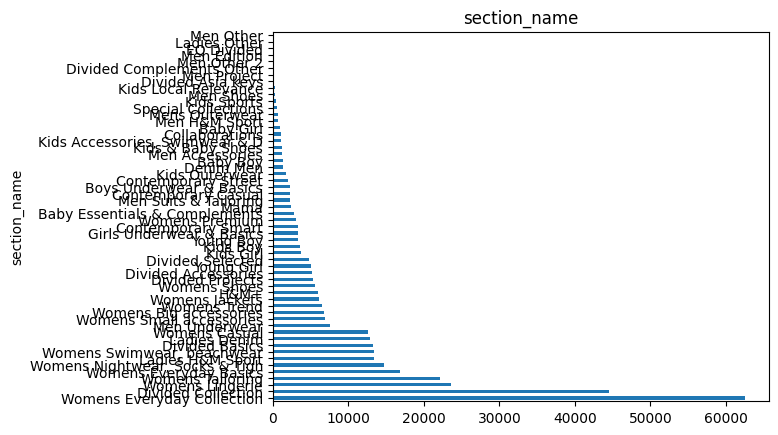

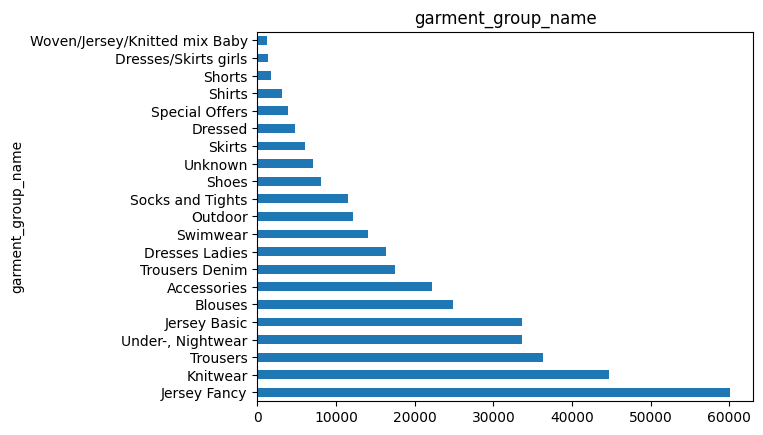

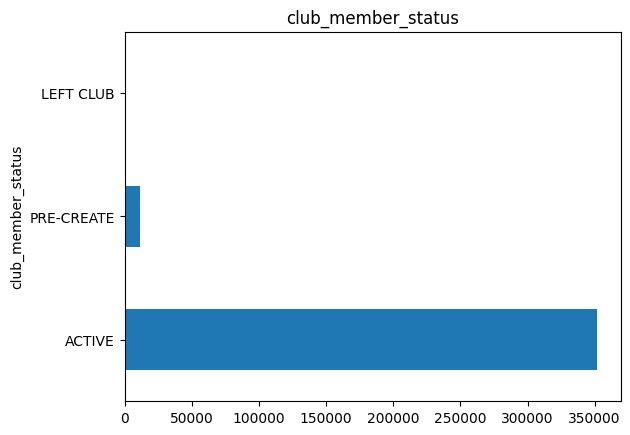

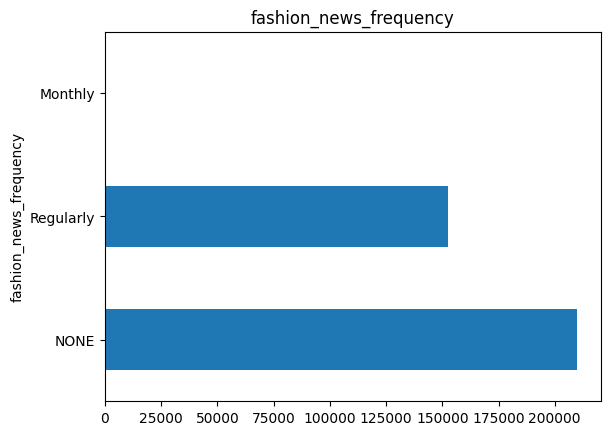

In [15]:
#barh plot de las variables categoricas
for col in df.columns:
    if df[col].dtype == 'category' or df[col].dtype == 'object' or df[col].dtype == 'bool':
        plt.figure()
        df[col].value_counts().plot(kind='barh')
        plt.title(col)
        plt.show()

In [16]:
#Eliminamos algunas variables categoricas con muchas categorias o que no aportan informacion relevante
df.drop(columns=['prod_name',
                 'product_type_name', 
                 'department_name', 
                 'section_name'], inplace=True)

## 2.1 Imputacion de nulos

In [17]:
#transform object columns to category
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [18]:
#print the type and the percentage of null values in each column of imputed_df
for col in df.columns:
    print('{} - {} - {}%'.format(col, df[col].dtype, round(df[col].isnull().mean()*100)))

Transaction_Date - datetime64[ns] - 0%
price - float64 - 0%
product_group_name - category - 0%
graphical_appearance_name - category - 0%
colour_group_name - category - 0%
perceived_colour_value_name - category - 0%
perceived_colour_master_name - category - 0%
index_name - category - 0%
index_group_name - category - 0%
garment_group_name - category - 0%
club_member_status - category - 0%
fashion_news_frequency - category - 0%
age - float64 - 1%


In [19]:
# Impute the missing values in the age column with the mean age
df['age'].fillna(df['age'].mean(), inplace=True)

/tmp/ipykernel_13147/1789449870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [20]:
#print the type and the percentage of null values in each column of imputed_df
for col in df.columns:
    print('{} - {} - {}%'.format(col, df[col].dtype, round(df[col].isnull().mean()*100)))

Transaction_Date - datetime64[ns] - 0%
price - float64 - 0%
product_group_name - category - 0%
graphical_appearance_name - category - 0%
colour_group_name - category - 0%
perceived_colour_value_name - category - 0%
perceived_colour_master_name - category - 0%
index_name - category - 0%
index_group_name - category - 0%
garment_group_name - category - 0%
club_member_status - category - 0%
fashion_news_frequency - category - 0%
age - float64 - 0%


In [ ]:
#Imputacion pesada, NO CORRER A MENOS QUE SEA NECESARIO IMPUTAR MUCHAS COLUMNAS CON MUCHOS NULOS
#transaction_date_index = df.pop('Transaction_Date')

#df = df.reset_index(drop=True)


#df = df.replace([np.inf, -np.inf], np.nan)

#categorical_cols = df.select_dtypes(include=['category', 'object','bool']).columns


#kds = mf.ImputationKernel(
#    df,
#    random_state=42,
#    mean_match_strategy = {feature: 'fast' if feature in categorical_cols else 'shap' for feature in df.columns},
#    mean_match_candidates=20)

#kds.mice(iterations=2)

#imputed_df = kds.complete_data(dataset=0, inplace=False)

#imputed_df['Transaction_Date'] = transaction_date_index

/usr/local/python/3.12.1/lib/python3.12/site-packages/miceforest/imputation_kernel.py:276: UserWarning: graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,club_member_status,fashion_news_frequency have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


## 3. Exploratory Data Analysis (EDA)

Understand the structure, distributions, and relationships in your data.

In [ ]:
# Basic information
print("Dataset Info:")
df.info()

print("\nBasic Statistics:")
df.describe()

In [ ]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found.")

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

### 3.1 Data Visualization

In [ ]:
# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Distributions', fontsize=16)

for idx, col in enumerate(df.columns[:4]):
    row = idx // 2
    col_idx = idx % 2
    axes[row, col_idx].hist(df[col], bins=30, edgecolor='black')
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Pairplot for feature relationships
sns.pairplot(df, hue='target', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Features', y=1.02, fontsize=14)
plt.show()

## 4. Data Preprocessing

Prepare the data for modeling by handling missing values, encoding, and scaling.

In [ ]:
# Handle missing values (if any)
# df.fillna(df.mean(), inplace=True)
# or
# df.dropna(inplace=True)

print("Data preprocessing completed.")
print(f"Final dataset shape: {df.shape}")

In [ ]:
# Encode categorical variables (if needed)
# df_encoded = pd.get_dummies(df, columns=['categorical_column'], drop_first=True)

# Feature engineering
# Create new features based on domain knowledge
# df['new_feature'] = df['feature_1'] * df['feature_2']

## 5. Feature Selection & Split

Separate features and target, then split into training and testing sets.

In [ ]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed.")

## 6. Model Development

Build and train machine learning models.

In [ ]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [ ]:
# Train and evaluate models
results = {}

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

## 7. Model Evaluation

Evaluate and compare model performance.

In [ ]:
# Compare model accuracies
plt.figure(figsize=(10, 6))
models_list = list(results.keys())
accuracies = list(results.values())

plt.bar(models_list, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Comparison', fontsize=14, fontweight='bold')
plt.ylim([0, 1])

# Add value labels on bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nBest Model: {max(results, key=results.get)} with accuracy: {max(results.values()):.4f}")

In [ ]:
# Confusion matrix for the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, 
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

## 8. Feature Importance

Analyze which features are most important for the model.

In [ ]:
# Feature importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Feature Importance', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nFeature Importance:")
    print(feature_importance)
else:
    print(f"{best_model_name} does not support feature importance.")

## 9. Model Tuning (Optional)

Fine-tune hyperparameters using Grid Search or Random Search.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Uncomment to run grid search (can be time-consuming)
# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

print("Hyperparameter tuning section (uncomment to run).")

## 10. Conclusions

Summarize your findings and next steps.

### Key Findings:
- List your main discoveries from the analysis
- Highlight model performance metrics
- Discuss feature importance insights

### Recommendations:
- Provide actionable recommendations based on your analysis
- Suggest areas for further investigation

### Next Steps:
- Deploy the best model
- Collect more data if needed
- Try advanced techniques (ensemble methods, deep learning, etc.)
- Monitor model performance in production

## 11. Save Model (Optional)

Save the trained model for future use.

In [ ]:
import pickle

# Save the best model
# with open('best_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)

# Save the scaler
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

print("Model saving section (uncomment to save).")